# Complete re-run 06/20/2024, 30% CV luminex, 50% CV functionals (rpm4, w Xin updates); QC index error corrected
## does not produce 05_boost figure, see 06_boost_paired

# Get decay parameters

In [1]:
library(nlme)
library(performance)
library(dplyr)
library(ggplot2)
# library(plyr)
source('decay.functions.r')
# set colors 
col = c('Pfizer'='#2933A3','CoronaVac'='#9DA3E7',
        'Hosp'='#8B182A','Out'='#E791BD')


Attaching package: 'dplyr'


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## read model data

In [2]:
data_decay=read.csv('../data-final/DS04-data_decay.rand_intercepts.just_model.csv',row.names=1) 
data_decay$virus = factor(as.character(data_decay$virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron'))

head(data_decay)

,vaccine,variable,antigen,virus,affinity,model_type,n,hl,hl_se,hl_t,...,I_se,I_t,Pr_t_I,Pr_t_hl,naive_2.5,naive_50,naive_97.5,naive_50_raw,naive_97.5_raw,naive_se
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CoronaVac,Alpha.RBD.C1q,RBD,Alpha,C1q,lm,56,-0.0006143962,0.0003778246,-1.6261414,...,0.03347245,3.932596,0.0002415242,0.10974203,0.8514664,1,1.266710,2045.875,2591.531,231.7655
57,CoronaVac,Beta.RBD.C1q,RBD,Beta,C1q,lm,26,-0.0021294641,0.0010758594,-1.9793145,...,0.10114949,1.324682,0.1977525589,0.05936241,0.5184145,1,2.221973,28432.750,63176.800,15660.9760
83,CoronaVac,Delta.RBD.C1q,RBD,Delta,C1q,lm,56,-0.0005481919,0.0003786758,-1.4476548,...,0.03343946,3.283467,0.0018025685,0.15349477,0.8664983,1,1.226207,2227.500,2731.375,235.9695
139,CoronaVac,Gamma.RBD.C1q,RBD,Gamma,C1q,lm,52,-0.0005682394,0.0004135541,-1.3740390,...,0.03743789,1.162840,0.2504142590,0.17555816,0.5884511,1,1.376384,3883.500,5345.188,900.5460
191,CoronaVac,Omicron.RBD.C1q,RBD,Omicron,C1q,lm,47,0.0005809210,0.0007403875,0.7846174,...,0.06738418,-3.688259,0.0006060414,0.43678906,0.5941412,1,1.404198,545335.250,765758.594,133732.5325
238,CoronaVac,WT.RBD.C1q,RBD,WT,C1q,lm,54,-0.0008508566,0.0008010399,-1.0621900,...,0.06917320,3.116501,0.0029783152,0.29305770,0.9023562,1,1.250513,1716.250,2146.194,170.5627


In [3]:
data_m = read.csv('../data-final/DS2-annotated_luminex.lum_func.melted.csv',stringsAsFactors = F)
# data_r = read.csv('../data-final/DS2-annotated_luminex.lum_func.melted.raw.csv',stringsAsFactors = F)


# # data_m$group = factor(as.character(data_m$group),levels = c('o','p','C'))
# data_m$virus = factor(as.character(data_m$virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
# data_r$virus = factor(as.character(data_r$virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
# #data_m$virus = relevel( factor(as.character(data_m$virus)) , ref = 'WT' )

# data_m = merge(data_m,data_r,suffixes = c('','_raw'),by=colnames(data_m)[colnames(data_m)!='value'])
head(data_m)
# head(data_r)
str(data_m)

,PlateNum,SampleNum,PlateID,PlateCoord,ID,vaccine,group,BOX,Lab.ID,Vaccine,...,Time.sample,DPFD,DPSD,DPTD,order,variable,value,antigen,virus,affinity
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,60,228,3,E12,Hosp-1,Hosp,p,3,p4 2020 G4,NA,...,D21,18,NA,NA,455.5,WT.Spike.C1q,1.115553,Spike,WT,C1q
2,1,1,1,A1,Naive,Naive,C,1,C64 2020 G4,Naive,...,PRE,NA,NA,NA,1.5,WT.Spike.C1q,1.050209,Spike,WT,C1q
3,2,2,1,A2,CoronaVac,CoronaVac,C,1,C64 2020 G4,CoronaVac,...,D28,29,1,NA,3.5,WT.Spike.C1q,1.086430,Spike,WT,C1q
4,3,3,1,A3,CoronaVac2,CoronaVac,C,1,C64 2020 G4,CoronaVac-2,...,D42,41,13,NA,5.5,WT.Spike.C1q,1.077140,Spike,WT,C1q
5,4,4,1,A4,CoronaVac2-3,CoronaVac,C,1,C64 2020 G4,CoronaVac2-2,...,M3,104,76,NA,7.5,WT.Spike.C1q,1.096555,Spike,WT,C1q
6,5,5,1,A5,CoronaVac2-5,CoronaVac,C,1,C64 2020 G4,CoronaVac2-3,...,M6,153,125,NA,9.5,WT.Spike.C1q,1.165344,Spike,WT,C1q


'data.frame':	123192 obs. of  21 variables:
 $ PlateNum   : int  60 1 2 3 4 5 6 7 8 9 ...
 $ SampleNum  : int  228 1 2 3 4 5 6 7 8 9 ...
 $ PlateID    : int  3 1 1 1 1 1 1 1 1 1 ...
 $ PlateCoord : chr  "E12" "A1" "A2" "A3" ...
 $ ID         : chr  "Hosp-1" "Naive" "CoronaVac" "CoronaVac2" ...
 $ vaccine    : chr  "Hosp" "Naive" "CoronaVac" "CoronaVac" ...
 $ group      : chr  "p" "C" "C" "C" ...
 $ BOX        : int  3 1 1 1 1 1 1 1 1 1 ...
 $ Lab.ID     : chr  "p4 2020 G4" "C64 2020 G4" "C64 2020 G4" "C64 2020 G4" ...
 $ Vaccine    : chr  NA "Naive" "CoronaVac" "CoronaVac-2" ...
 $ Tube.Label : chr  "P_PUC_H_004_(1)_G4" "S_PUC_C_064_(1)_G4" "S_PUC_C_064_(4)_G4" "S_PUC_C_064_(5)_G4" ...
 $ Time.sample: chr  "D21" "PRE" "D28" "D42" ...
 $ DPFD       : int  18 NA 29 41 104 153 153 NA 20 34 ...
 $ DPSD       : int  NA NA 1 13 76 125 125 NA NA 13 ...
 $ DPTD       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ order      : num  455.5 1.5 3.5 5.5 7.5 ...
 $ variable   : chr  "WT.Spike.C1q" "WT

# crossing

In [4]:
ref = 'Pfizer'
z=.95

data_decay %>% 
    filter(!is.na(virus)) %>%
    group_by(virus,antigen,affinity) %>% 
    mutate(
      # ref
        hl_wt = unique(hl[vaccine==ref]), #,data_decay %>% filter(virus==vi & vaccine==ref & antigen==antigen_i & affinity==affinity_i) %>% select(hl) %>% unique()
        I_wt =  unique(I[vaccine==ref]), #data_decay %>% filter(virus==vi & vaccine==ref & antigen==antigen_i & affinity==affinity_i) %>% select(I)%>% unique()
        
        # tmp=data_m %>% filter(virus==vi & vaccine=='Naive' & antigen==antigen_i & affinity==affinity_i )

        # upper_naive
        I_na = quantile(log10(data_m$value[data_m$virus==unique(virus)&data_m$antigen==unique(antigen)&data_m$affinity==unique(affinity)]),na.rm=T,probs = c(.5)),
        # upper_naive
        I_na_u = quantile(log10(data_m$value[data_m$virus==unique(virus)&data_m$antigen==unique(antigen)&data_m$affinity==unique(affinity)]),na.rm=T,probs = c(0.975)),
        # upper_naive
        I_na_l = quantile(log10(data_m$value[data_m$virus==unique(virus)&data_m$antigen==unique(antigen)&data_m$affinity==unique(affinity)]),na.rm=T,probs = c(0.025))
    ) #%>% group_by(vaccine) %>%
#         mutate(
#                     # mean
#         hl_va = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% select(hl)%>% unique()
#         I_va = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% select(I)%>% unique()
#         # upper
#         hl_va_u = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% mutate(upper=hl+qnorm(z)*hl_se) %>% select(upper) %>%unique()
#         I_va_u = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% mutate(upper=I+qnorm(z)*I_se) %>% select(upper) %>%unique()
#         # lower
#         hl_va_l = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% mutate(lower=hl-qnorm(z)*hl_se) %>% select(lower) %>%unique()
#         I_va_l =  data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i) %>% mutate(lower=I-qnorm(z)*I_se) %>% select(lower) %>%unique()

#             )

vaccine,variable,antigen,virus,affinity,model_type,n,hl,hl_se,hl_t,...,naive_50,naive_97.5,naive_50_raw,naive_97.5_raw,naive_se,hl_wt,I_wt,I_na,I_na_u,I_na_l
<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CoronaVac,Alpha.RBD.C1q,RBD,Alpha,C1q,lm,56,-6.143962e-04,0.0003778246,-1.62614144,...,1,1.266710,2045.875,2591.531,231.7655,-5.135726e-04,0.04658554,0.047455556,0.1745020,-0.06041329
CoronaVac,Beta.RBD.C1q,RBD,Beta,C1q,lm,26,-2.129464e-03,0.0010758594,-1.97931448,...,1,2.221973,28432.750,63176.800,15660.9760,2.707109e-05,0.34720649,0.075798468,0.2414208,-0.36686557
CoronaVac,Delta.RBD.C1q,RBD,Delta,C1q,lm,56,-5.481919e-04,0.0003786758,-1.44765480,...,1,1.226207,2227.500,2731.375,235.9695,-1.126297e-03,0.14163475,0.054736488,0.2129342,-0.06320555
CoronaVac,Gamma.RBD.C1q,RBD,Gamma,C1q,lm,52,-5.682394e-04,0.0004135541,-1.37403896,...,1,1.376384,3883.500,5345.188,900.5460,-1.544364e-03,0.11994211,-0.056723892,0.1079625,-0.43398827
CoronaVac,Omicron.RBD.C1q,RBD,Omicron,C1q,lm,47,5.809210e-04,0.0007403875,0.78461744,...,1,1.404198,545335.250,765758.594,133732.5325,-5.363774e-04,0.14195178,0.039652728,0.1318333,-0.20472656
CoronaVac,WT.RBD.C1q,RBD,WT,C1q,lm,54,-8.508566e-04,0.0008010399,-1.06219003,...,1,1.250513,1716.250,2146.194,170.5627,-1.665262e-03,0.22071135,0.075209095,0.3592400,-0.04256944
CoronaVac,Alpha.RBD.IgA1,RBD,Alpha,IgA1,lm,59,-1.563703e-03,0.0020926527,-0.74723476,...,1,3.571466,7209.000,25746.700,5945.8936,-5.538921e-03,0.82783099,0.404711166,1.5742519,-0.15581106
CoronaVac,Beta.RBD.IgA1,RBD,Beta,IgA1,lm,58,-8.144885e-04,0.0022554425,-0.36112136,...,1,4.258488,11986.250,51043.300,13132.2177,-5.795955e-03,0.77743965,0.371373821,1.5478674,-0.22104935
CoronaVac,Delta.RBD.IgA1,RBD,Delta,IgA1,lm,59,-1.684969e-03,0.0021846745,-0.77126761,...,1,2.889645,6359.000,18375.250,3943.0426,-5.576453e-03,1.20926181,0.392556417,1.6009568,-0.14909193


In [5]:
print('check')

[1] "check"


In [6]:
ref = 'Pfizer'
z=.95

crossing=data_decay %>% 
    group_by(virus,vaccine,antigen,affinity) %>%
    summarize(
        I = unique(I),
        hl= unique(hl),
        Pr_t_hl = unique(Pr_t_hl),
        Pr_t_I  = unique(Pr_t_I),
        naive_50_raw = unique(naive_50_raw),
        naive_se = unique(naive_se),
        # ref 
        hl_wt   = unique(data_decay$hl[data_decay$virus==virus & data_decay$vaccine==ref & data_decay$antigen==antigen & data_decay$affinity==affinity]),
        I_wt    = unique(data_decay$I[ data_decay$virus==virus & data_decay$vaccine==ref & data_decay$antigen==antigen & data_decay$affinity==affinity]),
        # mean 
        hl_va   = unique(hl),
        I_va    = unique(I) ,
        # upper
        hl_va_u = unique(hl+qnorm(z)*hl_se),
        I_va_u  = unique(I+ qnorm(z)*I_se ), 
        # lower
        hl_va_l = unique(hl-qnorm(z)*hl_se),
        I_va_l  = unique(I -qnorm(z)*I_se ), 
        # upper_naive
        I_na =   quantile(log10(data_m$value[data_m$virus==virus & data_m$vaccine==ref & data_m$antigen==antigen & data_m$affinity==affinity]),na.rm=T,probs = .5),
        # upper_naive
        I_na_u = quantile(log10(data_m$value[data_m$virus==virus & data_m$vaccine==ref & data_m$antigen==antigen & data_m$affinity==affinity]),na.rm=T,probs = .975),
        # lower_naive
        I_na_l = quantile(log10(data_m$value[data_m$virus==virus & data_m$vaccine==ref & data_m$antigen==antigen & data_m$affinity==affinity]),na.rm=T,probs = .025)
        # na_base=median(tmp$value,na.rm=T)
        # na_se=sd(tmp$value,na.rm=T)
    ) %>%
    mutate(
        # h_v + I_v = h_w + I_w
        # h_v + I_v = h_w + I_w
        x_mn = (I_wt - I_va)   / (hl_va   - hl_wt),
        x_l =  (I_wt - I_va_l) / (hl_va_u - hl_wt),
        x_u =  (I_wt - I_va_u) / (hl_va_l - hl_wt),
        n_mn = (I_na -  I_va) / (hl_va),
        n_u =  (I_na_u- I_va) / (hl_va),
        n_l =  (I_na_l- I_va) / (hl_va)
    )

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly."
`summarise()` has grouped output by 'virus', 'vaccine', 'antigen', 'affinity'. You can override using the `.groups`
argument.


In [7]:
head(crossing)

virus,vaccine,antigen,affinity,I,hl,Pr_t_hl,Pr_t_I,naive_50_raw,naive_se,...,I_va_l,I_na,I_na_u,I_na_l,x_mn,x_l,x_u,n_mn,n_u,n_l
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT,CoronaVac,N,C1q,0.1830099,-0.0006715858,0.43201457,2.536220e-02,5976.250,1252.0798,...,0.05275721,0.049224161,0.24979563,-0.10134148,93.83781,93.67361,95.38284,199.20868,-99.44484,423.4029
WT,CoronaVac,N,IgA1,0.2043295,-0.0016906426,0.19606563,6.189008e-02,9860.000,10442.5950,...,0.02805760,0.090860183,0.58047642,-0.20879727,-13.67710,296.74328,43.56060,67.11607,-222.48756,244.3608
WT,CoronaVac,N,IgG1,1.4736690,-0.0061094901,0.13923663,2.400196e-04,8898.625,16704.7441,...,0.86203151,-0.033198144,0.98555747,-0.42377202,671.23988,-105.57391,208.79428,246.64369,79.89399,310.5727
WT,CoronaVac,N,IgG2,0.2177289,-0.0006579005,0.62581116,6.784372e-02,5228.000,2507.4473,...,0.02514555,-0.041710548,0.15934341,-0.16267442,13684.89923,-23.84716,196.52150,394.34456,88.74523,578.2080
WT,CoronaVac,N,IgG3,1.0352429,-0.0038758382,0.12146456,9.440464e-06,4233.500,3210.6570,...,0.68242652,-0.007293153,0.42388424,-0.09218476,282.66568,-787.43660,174.92606,268.98337,157.73585,290.8861
WT,CoronaVac,N,IgG4,0.1530168,-0.0015719433,0.05938304,4.029621e-02,3361.250,180.5371,...,0.03281669,-0.006148311,0.06697873,-0.04667190,98.69268,157.85777,94.32401,101.25373,54.73357,127.0330


Warning message in max(data_decay$DPFI[is.finite(data_decay$DPFI)]):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 52 rows containing missing values or values outside the scale range (`geom_pointrange()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 18 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 6 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 18 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 6 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 8 rows containing missing values or values outside 

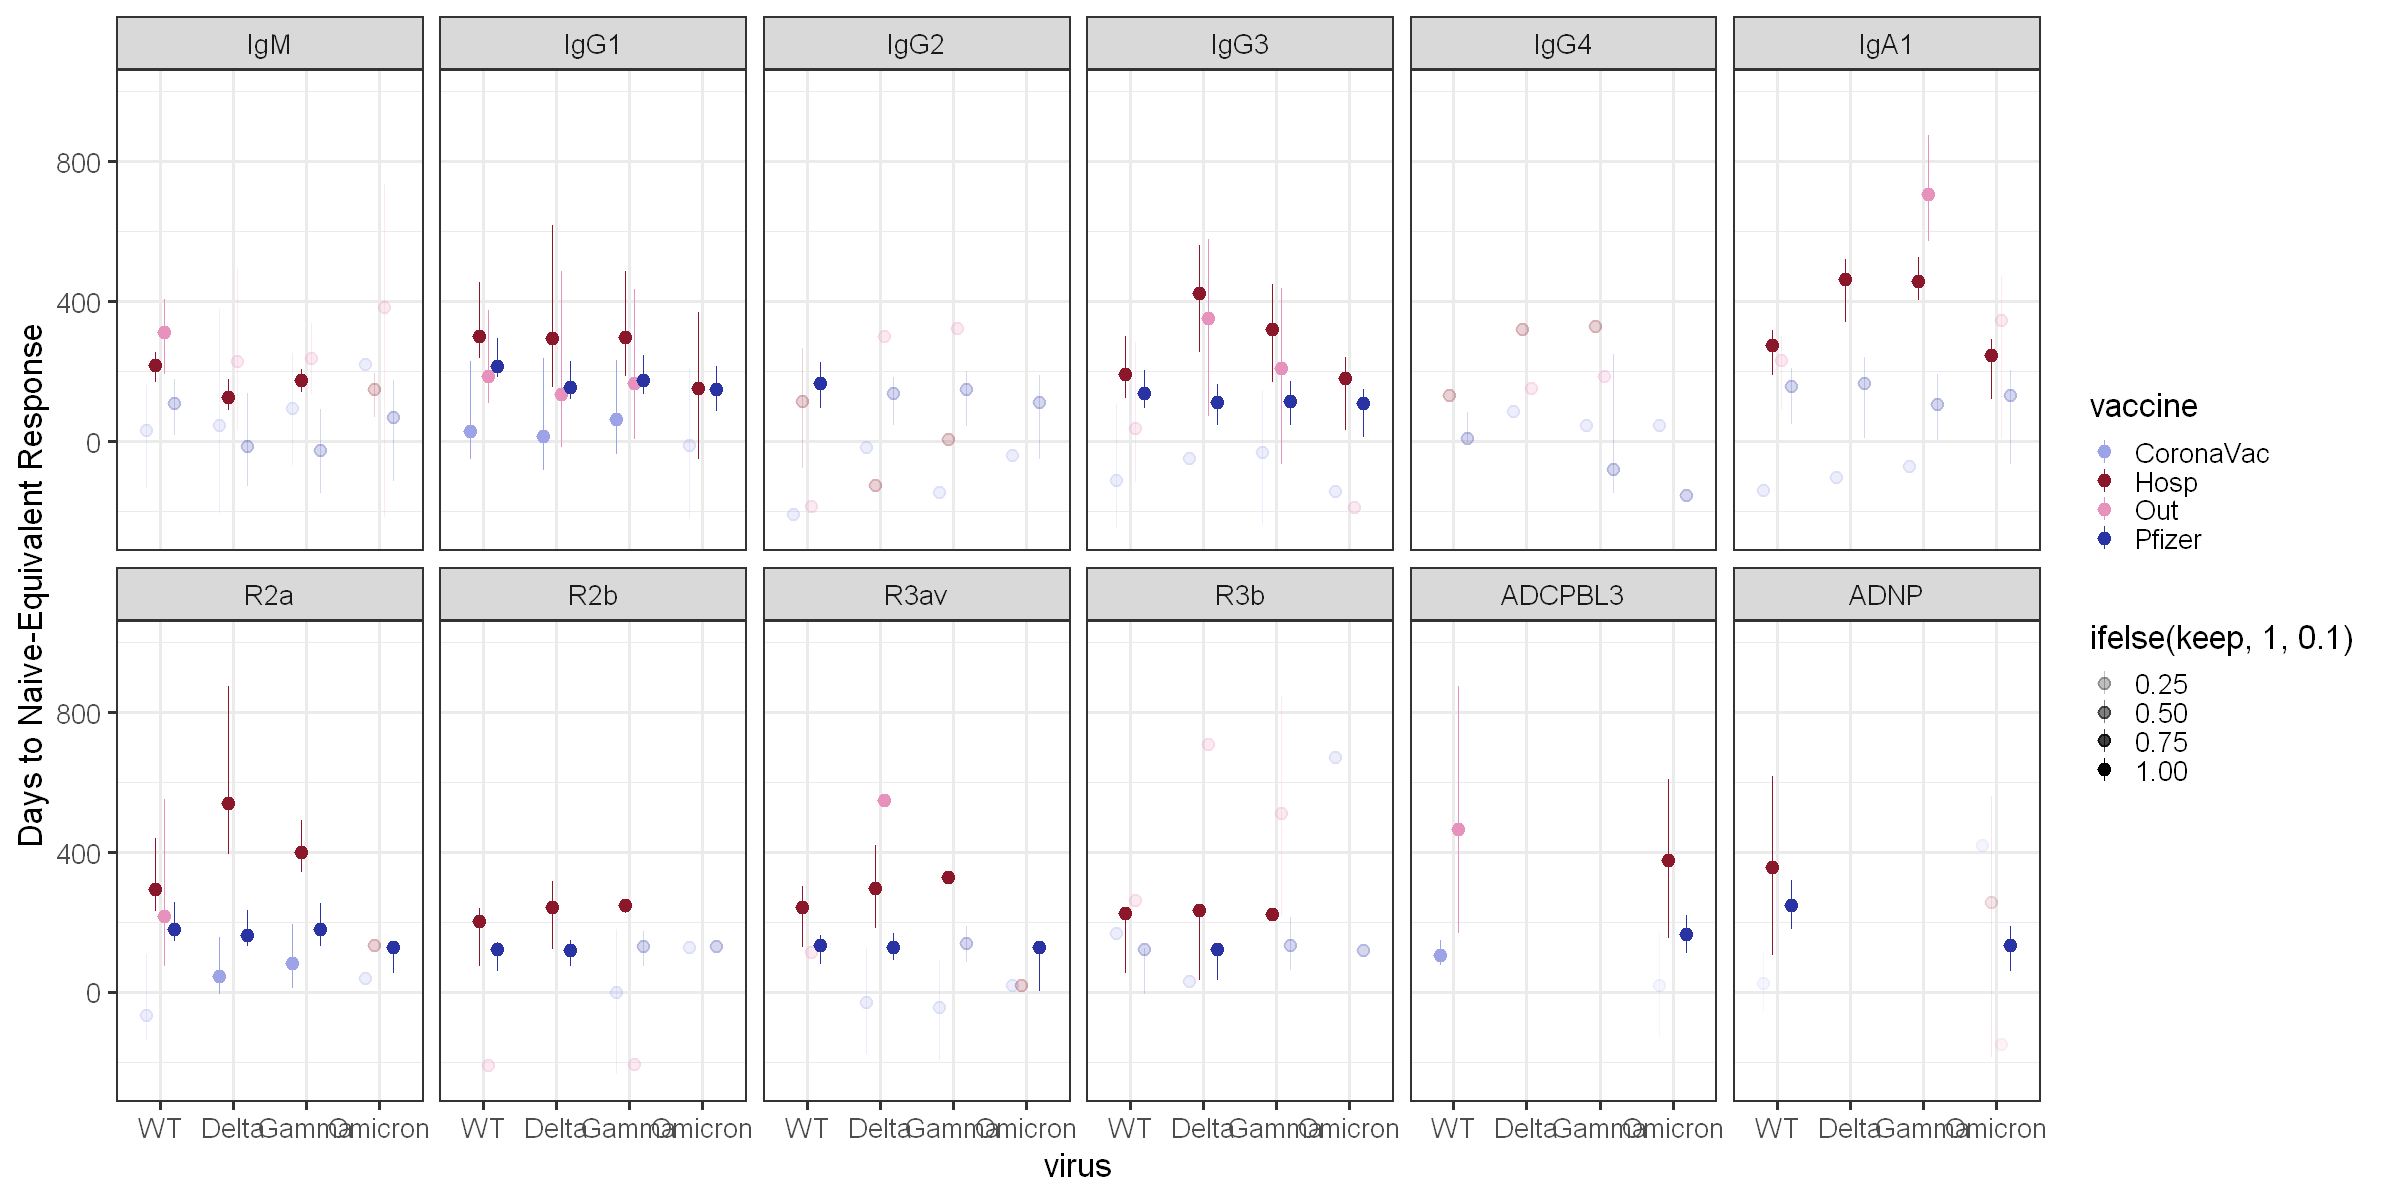

In [8]:
options(repr.plot.width=20,repr.plot.height=10)


# x_tmp = crossing %>% filter(I>0)
# x_tmp$I.1 = ifelse(x_tmp$I.1<0 | x_tmp$I.1>2e3,NA,x_tmp$I.1)
# x_tmp$I.2 = ifelse(x_tmp$I.2<(-1e4) | x_tmp$I.2>2e3,NA,x_tmp$I.2)

          
crossing%>%
    filter(
        virus %in% c('WT','Delta','Gamma','Omicron') & 
        antigen%in%c('Spike') & 
        # ref=='naive' & 
        # (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity)) &
        T
    ) %>% 
    mutate(
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','ADCPBL3','ADNP')),
        keep =  (exp(I)> 8 & !grepl('^A',affinity)   )|#& Pr_t_I<0.01 ) |
                (exp(I)> 3 & !grepl('WT',virus)      )|#& Pr_t_I<0.01 ) |
                (exp(I)> 2 &  (grepl('^A',affinity)) ) #& Pr_t_I<0.01 )
    ) %>% 
    filter( !is.na(affinity) & !is.na(virus) ) %>%
    ggplot(aes(x=virus,color=vaccine,y=n_mn,ymin=n_l,ymax=n_u,alpha=ifelse(keep,1,.1)))+ # ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) 
        geom_pointrange(position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI[is.finite(data_decay$DPFI)]),lty=2)+
        facet_wrap(~affinity,nrow=2)+
        ylab('Days to Naive-Equivalent Response') + ylim(c(-250,1000))
ggsave(filename = '../results/04_crossing/decay_parameters.estimated_crossing.spike_rbd.naive.pdf',height=8,width=30)
ggsave(filename = '../results/figS4.pdf',height=8,width=30)


# x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike') & ref=='Pfizer' & (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))) %>% 
#                mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>% #filter(affinity=='R2b')
#     ggplot(aes(x=virus,color=vaccine,y=I))+
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Pfizer-Equivalent Response')
# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.pfizer.pdf',height=8,width=30)

Warning message in max(data_decay$DPFI[is.finite(data_decay$DPFI)]):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 222 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 222 rows containing missing values or values outside the scale range (`geom_point()`)."


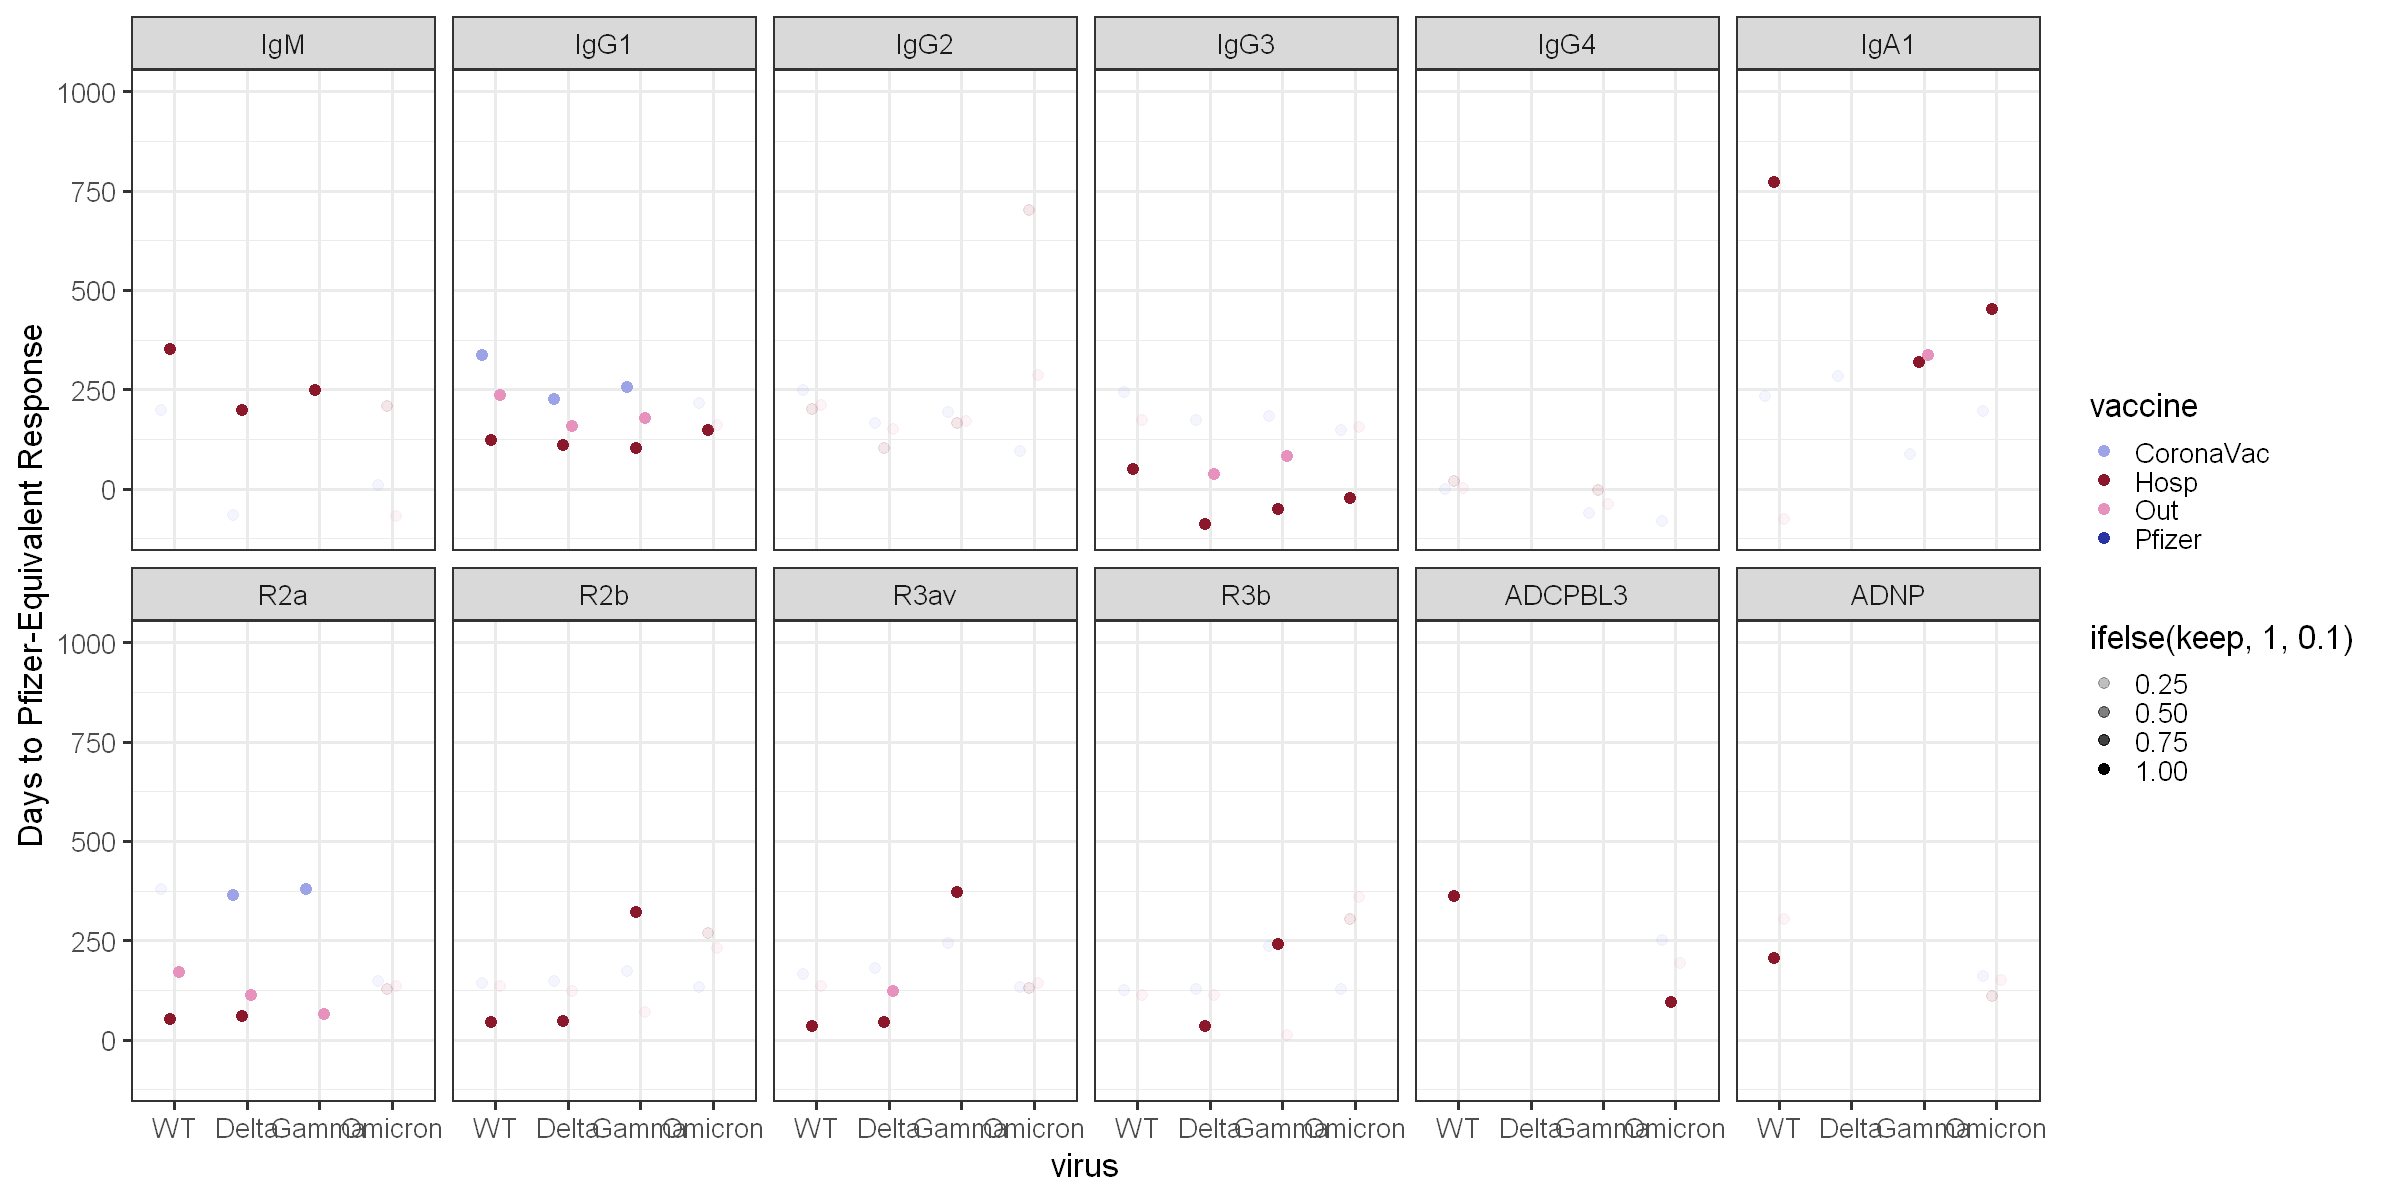

In [9]:
crossing%>%
    filter(
        virus %in% c('WT','Delta','Gamma','Omicron') & 
        antigen%in%c('Spike') & 
        # ref=='naive' & 
        # (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity)) &
        T
    ) %>% 
    mutate(
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','ADCPBL3','ADNP')),
        keep =  T &
                (exp(I)> 8 & !grepl('^A',affinity)   )|#& Pr_t_I<0.01 ) |
                (exp(I)> 3 & !grepl('WT',virus)      )|#& Pr_t_I<0.01 ) |
                (exp(I)> 2 &  (grepl('^A',affinity)) ) #& Pr_t_I<0.01 )
    ) %>% 
    filter( !is.na(affinity) & !is.na(virus) ) %>%
    ggplot(aes(x=virus,color=vaccine,y=x_mn,ymin=x_l,ymax=x_u,alpha=ifelse(keep,1,.1)))+ # ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) 
        geom_point(position = position_dodge(width=.5),size=3)+
        # geom_pointrange(position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI[is.finite(data_decay$DPFI)]),lty=2)+
        facet_wrap(~affinity,nrow=2)+
        ylab('Days to Pfizer-Equivalent Response') + ylim(c(-100,1000))
ggsave(filename = '../results//04_crossing/decay_parameters.estimated_crossing.spike_rbd.pfizer.pdf',height=8,width=30)

In [10]:
# options(repr.plot.width=15,repr.plot.height=8)


# x_tmp = crossing %>% filter(I>0)
# x_tmp$I.1 = ifelse(x_tmp$I.1<0 | x_tmp$I.1>2e3,NA,x_tmp$I.1)
# x_tmp$I.2 = ifelse(x_tmp$I.2<(-1e4) | x_tmp$I.2>2e3,NA,x_tmp$I.2)

          
# x_tmp%>%
#     filter(
#         virus %in% c('WT','Gamma','Omicron') & 
#         antigen%in%c('Spike') & 
#         ref=='naive' & 
#         (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))
#     ) %>% 
#     mutate(
#         affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))
#     ) %>%
#     ggplot(aes(x=virus,color=vaccine,y=I))+ # ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) 
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Naive-Equivalent Response')
# # ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.naive.pdf',height=8,width=30)

In [11]:
stop()

ERROR: Error in eval(expr, envir, enclos): 


# Trash

In [ ]:
# unique(data_decay[,c('vaccine','virus','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I')]) 

ref = 'Pfizer'
z=.95

crossing_orig=do.call(plyr::rbind.fill,lapply(unique(data_decay$virus),function(vi){
    # antigen_i='Spike'
    # affinity_i='IgG1'
do.call(plyr::rbind.fill,lapply(unique(data_decay$antigen),function(antigen_i){
do.call(plyr::rbind.fill,lapply(unique(data_decay$affinity),function(affinity_i){
    
    print(vi)
    tmp=data_m %>% filter(virus==vi & vaccine=='Naive' & antigen==antigen_i & affinity==affinity_i )
    
    if(nrow(tmp)==0){return(data.frame(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA))}
    
    qt_naive = quantile(log10(tmp$value),na.rm=T,probs = c(0.025,.5,0.975))
    # print('qt_naive')
    # print(10^(qt_naive))

    do.call(plyr::rbind.fill,lapply(unique(data_decay$vaccine),function(va){
        
        # print(paste(vi,ref,antigen_i,affinity_i,va))
                
        # ref 
        hl_wt   = data_decay %>% filter(virus==vi & vaccine==ref & antigen==antigen_i & affinity==affinity_i) %>% select(hl) %>% unique()
        I_wt    = data_decay %>% filter(virus==vi & vaccine==ref & antigen==antigen_i & affinity==affinity_i) %>% select(I)  %>% unique()
        # mean 
        hl_va   = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% select(hl) %>% unique()
        I_va    = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% select(I)  %>% unique()
        # upper
        hl_va_u = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% mutate(upper=hl+qnorm(z)*hl_se) %>% select(upper) %>% unique()
        I_va_u  = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% mutate(upper=I+qnorm(z)*I_se)   %>% select(upper) %>% unique()
        # lower
        hl_va_l = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% mutate(lower=hl-qnorm(z)*hl_se) %>% select(lower) %>% unique()
        I_va_l  = data_decay %>% filter(virus==vi & vaccine==va & antigen==antigen_i & affinity==affinity_i)  %>% mutate(lower=I-qnorm(z)*I_se)   %>% select(lower) %>% unique()
        # upper_naive
        I_na = qt_naive[2]
        # upper_naive
        I_na_u = qt_naive[3]
        # lower_naive
        I_na_l = qt_naive[1]
        na_base=median(tmp$value,na.rm=T)
        # na_se=sd(tmp$value,na.rm=T)
 
        if(prod(dim(I_wt)*dim(I_va))==0){return(data.frame(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA))}
        
        data.frame(
            virus = vi,
            vaccine=va,
            affinity=affinity_i,
            antigen=antigen_i,
            na_base=na_base,
            x_mn = (I_wt - I_va)   / (hl_va   - hl_wt),
            x_u =  (I_wt - I_va_u) / (hl_va_u - hl_wt),
            x_l =  (I_wt - I_va_l) / (hl_va_l - hl_wt),
            n_mn = (I_na -  I_va) / (hl_va),
            n_u =  (I_na_u- I_va) / (hl_va),
            n_l =  (I_na_l- I_va) / (hl_va)
        )
    })) 
    })) 
})) 
})) %>% 
#     filter(vaccine!=ref) %>%
    filter(virus %in% c('WT','Gamma','Omicron')) 

# crossing=rbind(
#     crossing[,1:5] %>% mutate(ref=ref),
#     crossing[,c(1:2,6:8)] %>% rename(I=I.3,I.1=I.4,I.2=I.5) %>% mutate(ref='naive')
#     )
# crossing

In [ ]:
head(crossing_orig[,1:14],n=10)

In [ ]:
#### TODO merge in basemean from data_decay******
crossing=rbind(
    crossing_orig[,1:8] %>% mutate(ref=ref),
    crossing_orig[,c(1:5,9:11)] %>% rename(I=I.3,I.1=I.4,I.2=I.5) %>% mutate(ref='naive')
    )
crossing

In [ ]:
write.csv(crossing,file='../data-final/DS05-data_decay.crossing.csv')
write.csv(crossing_orig,file='../data-final/DS05-data_decay.crossing_orig.csv')

In [ ]:
crossing = read.csv(file='../data-final/DS05-data_decay.crossing.csv')

In [ ]:
data_decay_small = read.csv(file='../data-final/DS04-data_decay.rand_intercepts.just_model.csv')
head(data_decay_small)

# Visuals

In [ ]:
options(repr.plot.width=15,repr.plot.height=8)


x_tmp = crossing %>% filter(I>0)
x_tmp$I.1 = ifelse(x_tmp$I.1<0 | x_tmp$I.1>2e3,NA,x_tmp$I.1)
x_tmp$I.2 = ifelse(x_tmp$I.2<(-1e4) | x_tmp$I.2>2e3,NA,x_tmp$I.2)

          
x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike') & ref=='naive' & (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=virus,color=vaccine,y=I))+ # ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) 
        geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Naive-Equivalent Response')
ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.naive.pdf',height=8,width=30)


x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike') & ref=='Pfizer' & (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>% #filter(affinity=='R2b')
    ggplot(aes(x=virus,color=vaccine,y=I))+
        geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Pfizer-Equivalent Response')
ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.pfizer.pdf',height=8,width=30)

# x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike') & ref=='naive' ) %>% 
#     ggplot(aes(x=vaccine,color=vaccine,y=I))+
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),size=.5)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_grid(antigen+ref~affinity,scale='free')+ylab('Days to Naive-Equivalent Response')
# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.not_spike_rbd.naive.pdf',height=10,width=30)

# x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike') & ref=='Pfizer' ) %>% 
#     ggplot(aes(x=vaccine,color=vaccine,y=I))+
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),size=.5)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_grid(antigen+ref~affinity,scale='free')+ylab('Days to Pfizer-Equivalent Response')
# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.not_spike_rbd.pfizer.pdf',height=10,width=30)

# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.pdf',height=9,width=5.5)
